In [1]:
%reset -f
import numpy as np
import torch
from IPython.display import clear_output
from IPython import display
import random
import matplotlib.pylab as plt
import copy
import gym

from gym.envs.toy_text.frozen_lake import generate_random_map

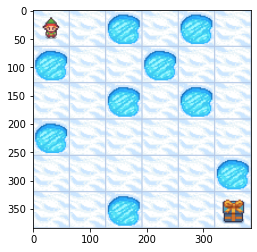

In [2]:
size = 6
env =gym.make('FrozenLake-v1', desc=generate_random_map(size=size), map_name=None, is_slippery=False)
env.reset()
plt.imshow(env.render(mode="rgb_array"))

In [3]:
action_values = np.zeros(shape=(size**2,4))

In [4]:
def policy(state, epsilon=0.):
    if np.random.random() < epsilon:
        return np.random.randint(4)
    else:
        av = action_values[state]
        return np.random.choice(np.flatnonzero(av == av.max()))

In [7]:
def n_step_sarsa(action_values, policy, episodes, alpha=0.1, gamma=0.99, epsilon=0.2,n=8):
    
    for episode in range(1, episodes + 1):
        state = env.reset()
        action = policy(state, epsilon)
        transitions = []
        done = False
        t = 0
        while t-n < len(transitions):
            if not done:
                next_state, reward, done, _ = env.step(action)
                next_action = policy(next_state, epsilon)
                transitions.append([state, action, reward])
            
            if t >= n:
                G = (1-done)*action_values[next_state][next_action]
                for state_t, action_t, reward_t in reversed(transitions[t-n:]):
                    G = reward_t + gamma*G
                action_values[state_t][action_t] += alpha*(G - action_values[state_t][action_t])

            
            t += 1
            state = next_state
            action = next_action

In [13]:
n_step_sarsa(action_values, policy, 100000)

In [14]:
np.argmax(action_values,axis=1).reshape(size,size)

array([[2, 1, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 1],
       [2, 1, 0, 1, 0, 1],
       [0, 2, 1, 2, 1, 0],
       [2, 2, 2, 1, 1, 0],
       [3, 0, 0, 2, 2, 0]])

In [60]:
 # - 0: LEFT
 #    - 1: DOWN
 #    - 2: RIGHT
 #    - 3: UP

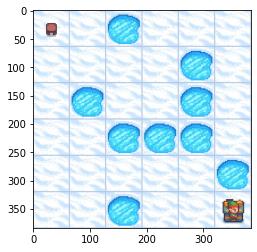

In [70]:
plt.imshow(env.render(mode="rgb_array"))

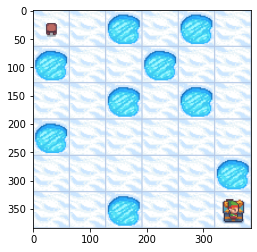

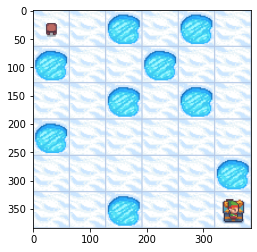

In [15]:
import time
state = env.reset()
action = policy(state, epsilon=0)
done = False
while not done:
    plt.cla()
    next_state, reward, done, _ = env.step(action)
    action = policy(next_state, epsilon=0)

    plt.imshow(env.render(mode="rgb_array"))
    time.sleep(0.1)

    display.clear_output(wait=True)
    display.display(plt.gcf())
    plt.gcf()